# 2. Analiza punktów stacjonarnych

Szukamy rozwiązań jednorodnych przestrzennie i stacjonarnych w czasie. Zerujemy pochodne czasowe i oraz wyrazy dyfuzyjne. Układ równań (4)-(5) upraszcza się do postaci algebraicznej:

$\displaystyle \begin{cases} 0 = a - u - u v^2 \\ 0 = u v^2 - m v \end{cases}$

Z drugiego równania wyłączamy $v$ przed nawias:
$v (u v - m) = 0$

Mamy dwa przypadki (dwa rodzaje stanów równowagi):

### Przypadek 1: Pustynia ($v = 0$)
Jeśli nie ma roślin ($v=0$), to z pierwszego równania otrzymujemy:
$a - u = 0 \implies u = a$
Istnieje zawsze jeden punkt stacjonarny (stan pustynny):
$$P_0 = (a, 0)$$

### Przypadek 2: Roślinność ($v \neq 0$)
Wtedy z drugiego równania musi zachodzić $uv = m \implies u = \frac{m}{v}$.
Podstawiamy to do pierwszego równania:
$$a - \frac{m}{v} - \left(\frac{m}{v}\right) v^2 = 0 $$
$$ a - \frac{m}{v} - m v = 0 \quad | \cdot v $$
$$a v - m - m v^2 = 0$$

Otrzymujemy równanie kwadratowe dla poziomu biomasy $v$:
$$m v^2 - a v + m = 0$$

Wyróżnik tego równania wynosi:
$\Delta = (-a)^2 - 4 \cdot m \cdot m = a^2 - 4m^2$

Rozwiązania istnieją tylko wtedy, gdy $\Delta \ge 0$, czyli gdy opady są wystarczająco duże:
$a^2 \ge 4m^2 \implies a \ge 2m$

Wtedy mamy dwa stany roślinne:
$$v_{\pm} = \frac{a \pm \sqrt{a^2 - 4m^2}}{2m}$$

**Wnioski:**
* Dla $a < 2m$ jedynym stanem jest pustynia ($P_0$).
* Dla $a > 2m$ pojawiają się dwa dodatkowe stany z roślinnością ($v_+$ i $v_-$).
* Punkt $a = 2m$ to punkt bifurkacji.

# 3. Analiza stabilności

Aby określić stabilność wyznaczonych stanów stacjonarnych, badamy zachowanie układu pod wpływem małych zaburzeń. Obliczamy macierz Jacobiego (linearyzacja układu):

$$
J(u,v) = \begin{pmatrix}
\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\
\frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix} =
\begin{pmatrix}
-1 - v^2 & -2uv \\
v^2 & 2uv - m
\end{pmatrix}
$$

Punkt jest stabilny, jeśli części rzeczywiste wszystkich wartości własnych macierzy $J$ są ujemne ($\text{Re}(\lambda) < 0$).

### Stabilność stanu pustynnego $P_0 = (a, 0)$
Podstawiamy $u=a, v=0$ do macierzy Jacobiego:
$$
J(P_0) = \begin{pmatrix}
-1 & 0 \\
0 & -m
\end{pmatrix}
$$
Macierz jest diagonalna, więc wartości własne to elementy na przekątnej:
$\lambda_1 = -1, \quad \lambda_2 = -m$.
Ponieważ parametry $m$ są dodatnie, obie wartości własne są zawsze ujemne.
**Wniosek:** Stan pustynny jest zawsze stabilny względem jednorodnych zaburzeń.

### Stabilność stanów roślinnych ($v \neq 0$)
Dla stanów $v_+$ i $v_-$ korzystamy z zależności $u = m/v$. Macierz przyjmuje postać:
$$
J(P_{\pm}) = \begin{pmatrix}
-1 - v^2 & -2m \\
v^2 & m
\end{pmatrix}
$$

O stabilności decydują właściwości macierzy Jacobiego. Punkt jest stabilny jeśli:
1. $\text{Tr}(\mathbf{J}) < 0$
2. $\det(\mathbf{J}) > 0$

* **Stan $v_-$ (rzadka roślinność):** Wykazuje cechy **punktu siodłowego** (ujemny wyznacznik). Oznacza to, że jest on **zawsze niestabilny** – nawet najmniejsze wahania w ekosystemie sprawią, że ten stan zniknie.
* **Stan $v_+$ (bujna roślinność):** Spełnia warunki stabilności (dla $a > 2m$). Oznacza to, że system dąży do utrzymania tego stanu i potrafi samoczynnie powrócić do równowagi po wystąpieniu małych zaburzeń.

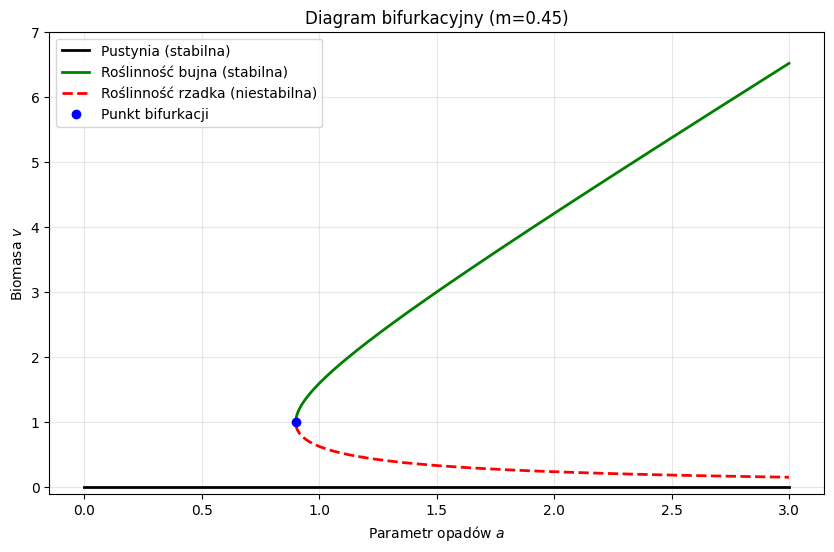

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from pipeline.parameters import KlausmeierParameters

params = KlausmeierParameters(A=2.0, L=1.0, R=0.5, J=1.0, M=0.45, Dw=0.1, Dn=0.01)
m = params.get_dimensionless_params()['m']

# zakres a
a_values = np.linspace(0, 3.0, 1000)
a_bif = 2 * m

# funkcja sprawdzająca stabilność numerycznie (wartości własne)
def check_stability(u, v, m_val):
    # macierz Jacobiego
    J = np.array([
        [-1 - v**2, -2*u*v],
        [v**2,      2*u*v - m_val]
    ])
    eigenvalues = np.linalg.eigvals(J)
    if np.any(np.real(eigenvalues) > 0):
        return False 
    return True

v_pustynia = np.zeros_like(a_values)
v_plus_stable = np.full_like(a_values, np.nan)
v_plus_unstable = np.full_like(a_values, np.nan)
v_minus_stable = np.full_like(a_values, np.nan)
v_minus_unstable = np.full_like(a_values, np.nan)

for i, a in enumerate(a_values):
    # 1. pustynia (v=0, u=a)
    v_pustynia[i] = 0
    
    # 2. roślinność (tylko gdy a > 2m)
    if a >= a_bif:
        delta = a**2 - 4*m**2
        
        # rozwiązanie v_plus
        vp = (a + np.sqrt(delta)) / (2*m)
        up = m / vp
        if check_stability(up, vp, m):
            v_plus_stable[i] = vp
        else:
            v_plus_unstable[i] = vp
        
        # rozwiązanie v_minus
        vm = (a - np.sqrt(delta)) / (2*m)
        um = m / vm
        if check_stability(um, vm, m):
            v_minus_stable[i] = vm
        else:
            v_minus_unstable[i] = vm

plt.figure(figsize=(10, 6))

# pustynia (zawsze stabilna)
plt.plot(a_values, v_pustynia, 'k-', linewidth=2, label='Pustynia (stabilna)')

plt.plot(a_values, v_plus_stable, 'g-', linewidth=2, label='Roślinność bujna (stabilna)')
plt.plot(a_values, v_plus_unstable, 'g--', linewidth=2)
plt.plot(a_values, v_minus_stable, 'r-', linewidth=2)
plt.plot(a_values, v_minus_unstable, 'r--', linewidth=2, label='Roślinność rzadka (niestabilna)')

plt.plot(a_bif, 1.0, 'bo', label='Punkt bifurkacji')

plt.title(f"Diagram bifurkacyjny (m={m})")
plt.xlabel("Parametr opadów $a$")
plt.ylabel("Biomasa $v$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 7)
plt.savefig('../diagram_bifurkacji.png', dpi=300, bbox_inches='tight')
plt.show()